In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
result = []
result.append((1, 1, df["User_ID"].size))
result.append((2, 1, df.loc[df["Gender"]=="male", "Gender"].size))
result.append((3, 1, df["Duration"].mean()))
result.append((4, 1, df.loc[df["Age"]>=75, "Age"].size))

In [3]:
df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender,Calories
0,14498311,79,165,73,13,79,40.0,male,54
1,16700865,28,148,48,6,91,39.4,female,28
2,17197650,27,187,82,25,101,40.8,male,128
3,16400540,40,173,71,16,93,40.4,male,69
4,15539631,40,183,90,5,80,39.0,male,14


In [4]:
df.columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Gender', 'Calories'],
      dtype='object')

In [5]:
def mod(df):
    df["Gender"] = df["Gender"].map({
        "male": 0,
        "female": 1,
    })
    df.loc[df["Gender"].isna(), "Gender"] = 0
    #df["DurationOverAge"] = df["Duration"]/df["Age"]
    #df["HeightToWeight"] = df["Height"]/df["Weight"]
    df["Heart_Rate"]-=df["Heart_Rate"].min()
    df["Intensity"] = df["Heart_Rate"]*df["Duration"]
    df["Age"] -= df["Age"].min()
    df = df.drop(columns=["Height", "Body_Temp"])
    cols = df.drop(columns=["User_ID"])
    if("Calories" in set(df.columns)):
        cols = cols.drop(columns=["Calories"])
    if("Subtask" in set(df.columns)):
        cols = cols.drop(columns=["Subtask"])
    featurecnt = 0
    for f1 in cols.columns:
        for f2 in cols.columns:
            for f3 in cols.columns:
                df["feature" + str(featurecnt)] = df[f1]*df[f2]*df[f3]
                featurecnt += 1
    return df

In [6]:
df = mod(df)
test = mod(test)

/tmp/ipykernel_224443/2381194110.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["feature" + str(featurecnt)] = df[f1]*df[f2]*df[f3]
/tmp/ipykernel_224443/2381194110.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["feature" + str(featurecnt)] = df[f1]*df[f2]*df[f3]
/tmp/ipykernel_224443/2381194110.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

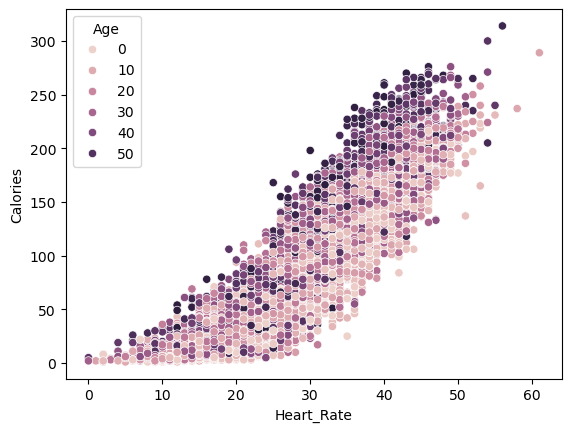

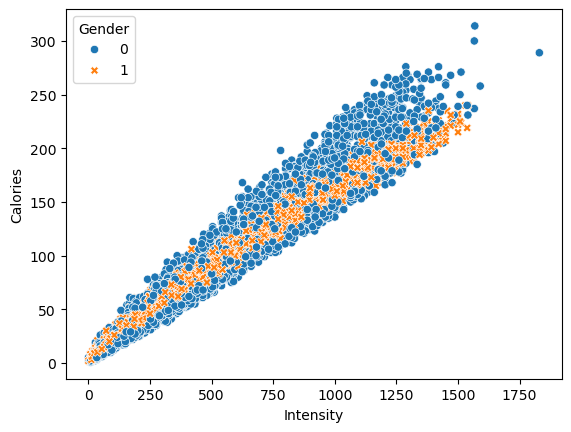

In [7]:
seaborn.scatterplot(df, x="Heart_Rate", y="Calories", hue="Age")
plt.show()
seaborn.scatterplot(df, x="Intensity", y="Calories", hue="Gender", style="Gender")
plt.show()

In [8]:
x = df.drop(columns=["User_ID", "Calories"])
y = df["Calories"]
#x = StandardScaler().fit_transform(x, y)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#model = RandomForestRegressor(random_state=42, n_jobs=-1)
#model = GradientBoostingRegressor(n_estimators=500)
model = LinearRegression()
model.fit(xtrain, ytrain)

yres = model.predict(xtest)

print(mean_absolute_error(ytest, yres))

0.2726371636311422


In [10]:
model.fit(x, y)

sb5 = test.drop(test[test["Subtask"]==6].index)
z = sb5.drop(columns=["User_ID", "Subtask"])
a = model.predict(z)

for i, val in zip(sb5["User_ID"], a):
    result.append((5, i, val))

xmales = df.drop(df[df["Gender"]=="female"].index)
ymales = xmales["Calories"]
xmales = xmales.drop(columns=["Calories", "User_ID"])
model.fit(xmales, ymales)
sb6 = test.drop(test[test["Subtask"]==5].index)
z = sb6.drop(columns=["User_ID", "Subtask"])
b = model.predict(z)

for i, val in zip(sb6["User_ID"], b):
    result.append((6, i, val))

In [11]:
dfout = pd.DataFrame(result, columns=["subtaskID", "datapointID", "answer"])

In [12]:
dfout.to_csv("output.csv", index=False)